# Exercise 1 - Solutions

## Logistic Map 

### Code the Logistic Map

Write a function that returns a $N$ steps long trajectory of a logistic map given an initial condition $x_0$ and parameter value $r$, where $1 < r < 4$.

In [1]:
import Pkg
Pkg.activate(".") # I activate the local environment 
                                    
using Plots 

f(x; r=3) = r*x*(1-x) # thats the rhs 

# that's a slower version of the code
function logistic_map_slow(x_0, r, N=50) 
    x = [x_0]

    for i=2:N
        push!(x, f(x[i-1];r))
    end
    x
end 

# that's a faster version that pre-allocates memory, T here stands for a non-specified type
# it could be a Float64, the compiler automatically recognizes what is needed, we will talk about this in 
# Lecture 3
function logistic_map(x_0::T, r::T, N::Integer=50) where T
    x = zeros(T, N)
    x[1] = x_0

    for i=2:N
        x[i] = f(x[i-1]; r)
    end
    x
end 

  Activating project at `~/Nextcloud/TUM-Dynamics-Lecture/exercises/exercise-1`
[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]


logistic_map (generic function with 2 methods)

### Plot trajectories

Julia has one major plotting library `Plots.jl` that can use different backends for plotting (like Python's matplotlib or plotly). After importing the library with `using Plots`, a basic plot is called by `plot(x,y)`. If you want to add to an exisiting plot, use `plot!(x,y)`. You can adjust the plot by adding keyword arguments. Some common keyword arguments are: 

* `ylims=[lower_limit, upper_limit]`
* `xlims=[lower_limit, upper_limit]`
* `title`
* `xlabel`
* `ylabel`
* all further keyword arguments are listed there: https://docs.juliaplots.org/stable/attributes/

For those how are familiar with Python, you can also use `matplotlib.pyplot` directly, there is a Julia wrapper, called `PyPlot.jl`. The syntax is almost the same as in Python. See its documentation (https://github.com/JuliaPy/PyPlot.jl) for how exactly it translates. 

Now, plot trajectories of the logistic map for different values of $1 < r < 4$, that are $N=50$ steps long. 


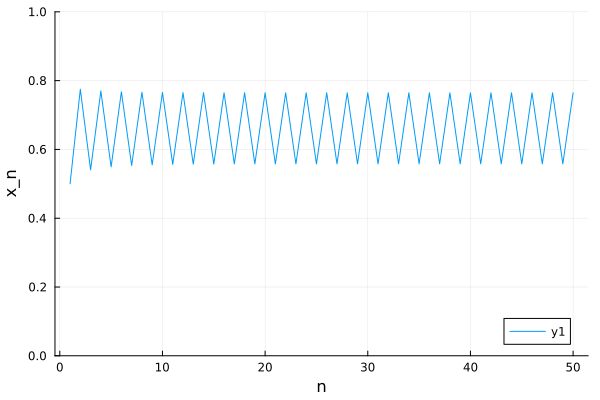

In [2]:
plot(logistic_map(0.5, 3.1),ylims=[0,1],xlabel="n",ylabel="x_n")

### Explore the Logistic Map

If you keep the $r$ constant, e.g. at $r=2.9$ and $r=3.2$, what are you observing for different initial conditions $x_0$? 


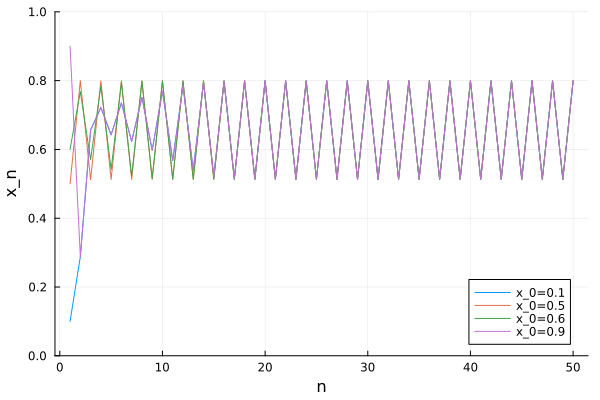

In [3]:
plot(logistic_map(0.1, 3.2),ylims=[0,1],xlabel="n",ylabel="x_n",label="x_0=0.1")
plot!(logistic_map(0.5, 3.2),ylims=[0,1],label="x_0=0.5")
plot!(logistic_map(0.6, 3.2),ylims=[0,1],label="x_0=0.6")
plot!(logistic_map(0.9, 3.2),ylims=[0,1],label="x_0=0.9")

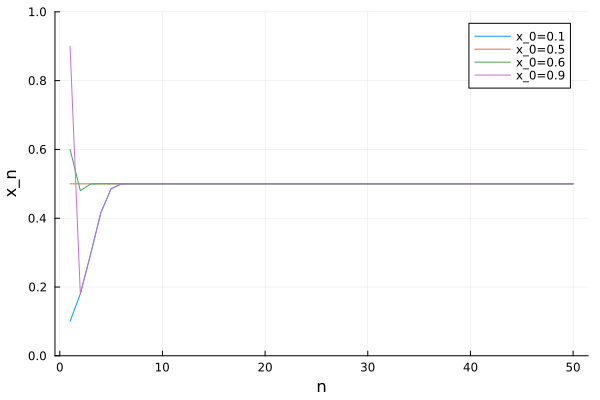

In [4]:
plot(logistic_map(0.1, 2.),ylims=[0,1],xlabel="n",ylabel="x_n",label="x_0=0.1")
plot!(logistic_map(0.5, 2.),ylims=[0,1],label="x_0=0.5")
plot!(logistic_map(0.6, 2.),ylims=[0,1],label="x_0=0.6")
plot!(logistic_map(0.9, 2.),ylims=[0,1],label="x_0=0.9")

At which points $r_c \in [2.7;3.6]$  does the trajectory change its behaviour and how? 

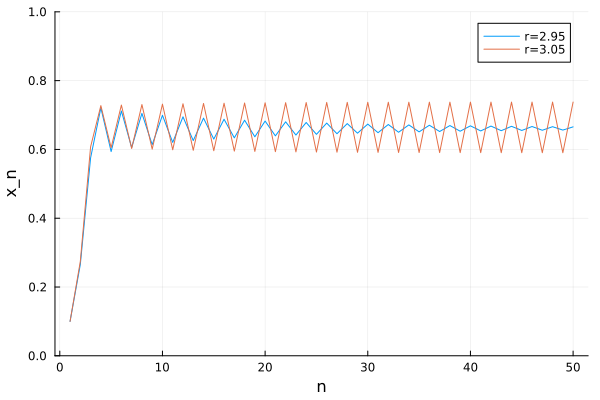

In [5]:
plot(logistic_map(0.1, 2.95),ylims=[0,1],label="r=2.95",xlabel="n",ylabel="x_n")
plot!(logistic_map(0.1, 3.05),ylims=[0,1],label="r=3.05")
# Oscillations don't damp out any more at r=3

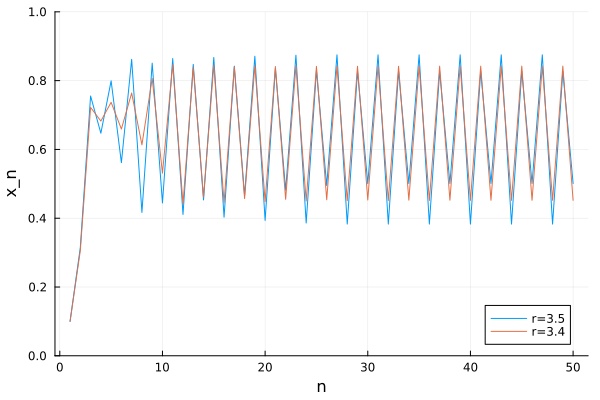

In [6]:
plot(logistic_map(0.1, 3.5),ylims=[0,1],label="r=3.5",xlabel="n",ylabel="x_n")
plot!(logistic_map(0.1, 3.4),ylims=[0,1],label="r=3.4")

The period of the oscillation doubles, at $r=3.4$ the oscillation has a period $2$ and at $r=3.5$ the period is $4$. That's the first period doubling of the logistic map.

The rest, we will do a bit more systematic now

### Plotting a famous diagram

Plot a diagram with $r$ on the x axis and the last 50 points of 100 steps long trajectories of a logistic map on the y axis for $2.5 < r < 4$. Use the same initial conditions $x_0$ for every trajectory.

#### Tips 

* use `scatter!` For the plots. The keyword argument `markersize` determines the size of the scatter points, it should be $<1$ here
* If you use any plot inside of a loop, use the `show=true` argument so that your editor really shows the plot

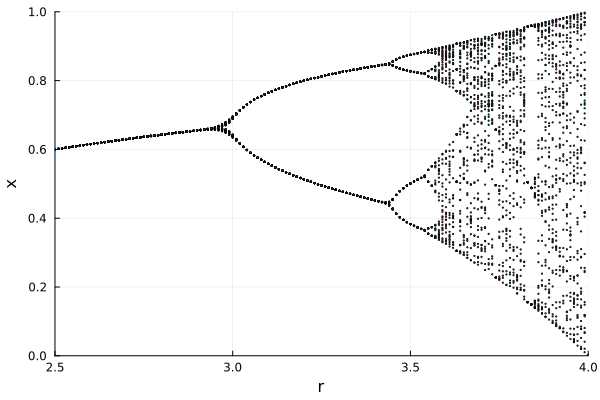

In [7]:
r_vals = 2.5:0.01:4
plot(0,0) # initialize an empty plot
for r ∈ r_vals 
    y = logistic_map(0.5, r, 100)
    scatter!(ones(50)*r, y[51:end], xlims=[r_vals[1], r_vals[end]], ylims=[0,1], show=true, markersize = 0.8,legend=nothing)
end 
plot!(0,0, xlabel="r",ylabel="x")

What you are seeing is a simple version of a orbit diagram or bifurcation diagram. We will talk about what happens there in the next lectures.